
- [참고 - 위키독스, PyTorch로 시작하는 딥러닝 입문](https://wikidocs.net/52846)

## 1. 타입 캐스팅 (Type Casting)
- Data type 변환 
- https://pytorch.org/docs/stable/tensors.html



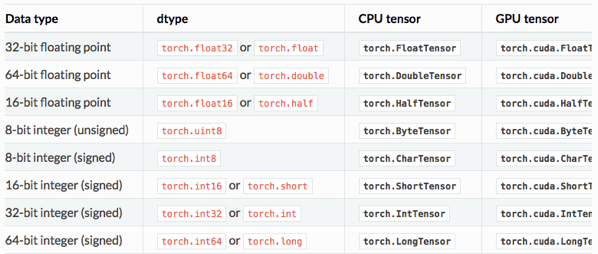

In [ ]:
import torch

In [ ]:
## 1) 'long' type -  'lt' Tensor 선언
lt = torch.LongTensor([1, 2, 3, 4])
print('LongTensor: ', lt)

LongTensor:  tensor([1, 2, 3, 4])


In [ ]:
print('--> float: ', lt.float()) # Tensor에 .float() 붙이면 --> 바로 float 형으로 타입 변경 

--> float:  tensor([1., 2., 3., 4.])


In [ ]:
## 1) 'Byte' type -  'bt' Tensor 선언
bt = torch.ByteTensor([True, False, False, True])
print('ByteTensor: ', bt)

ByteTensor:  tensor([1, 0, 0, 1], dtype=torch.uint8)


In [ ]:
print('--> long: ',bt.long())   # .long()  --> change to 'long' type
print('--> float: ',bt.float())  # .float() --> change to 'float' type

--> long:  tensor([1, 0, 0, 1])
--> float:  tensor([1., 0., 0., 1.])


## 2. 연결하기 ( Concatenate)
- `torch.cat([ ])` 
- 어느 차원 늘릴지 인자로 줄 수 있음 
- 딥 러닝에서 주로 모델의 입력 or 중간 연산에서 두 Tensor 연결하는 경우 많음.
- ==> 두 가지의 정보를 모두 사용한다는 의미

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [ ]:
## 1) 0번쨰 차원 늘리기
print(torch.cat([x, y], dim=0)) 
print(torch.cat([x, y], dim=0).shape)   # (2 × 2) --> (4 × 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])


In [ ]:
## 1) 1번쨰 차원 늘리기
print(torch.cat([x, y], dim=1)) 
print(torch.cat([x, y], dim=1).shape) # (2 × 2) --> (2, 4)

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])
torch.Size([2, 4])


## 3. 스텍킹 (Stacking)
- `torch.stack([])`
- 연결의 다른 방법
- 쌓는 방법 
- 많은 연산 포함하여 `Concatenate`보다 편리한 경우 있음

In [ ]:
## size (2,) vector 
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [ ]:
## 3 vec Stacking
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z]).shape) ## --> (3, 2) => x / y / z 순차적으로 위쪽으로 쌓임

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])


In [ ]:
# 위의 Stacking과 동일한 방법 = 0 dim Unsqueeze + Concatenate
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0).shape)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])


In [ ]:
## Stacking 인자 주기 - dim = 1
print(torch.stack([x, y, z], dim=1))
print(torch.stack([x, y, z], dim=1).shape) # --> (2, 3) => x + y + z 순차적으로 오른쪽으로 쌓임

tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


## 4. 채우기 
- `zeros_like()` : `0`으로 채우기
- `ones_like()`  :   `1`로 채우기

In [ ]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])  # (2 × 3) Tensor
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [ ]:
# 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기
print(torch.ones_like(x)) 

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
 # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


## 5. 덮어쓰기 연산 (In-place Operation)
- 연산 뒤에 `_` 붙여 기존 값 덮어쓰기

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]]) # (2 × 2) Tensor

print(x.mul(2.))  # 곱하기 2를 수행한 결과를 출력
print(x)          # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x.mul_(2.))  # .mul_() 

tensor([[2., 4.],
        [6., 8.]])


In [ ]:
print(x)   # 변경되어 저장된 기존 변수  x 확인 

tensor([[2., 4.],
        [6., 8.]])
